<a href="https://colab.research.google.com/github/ollihansen90/neuroinformatik/blob/main/Vergleich_Lossfunktionen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Typische Lossfunktionen
In diesem Notebook sollen kurz typische Lossfunktionen vorgestellt werden. Hierfür wird ein Vektor mit lernbaren Einträgen erstellt, die mit Hilfe der jeweiligen Lossfunktion und einem Optimierer (hier: Stochastic Gradient Descent, [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) angepasst werden. Ziel dabei ist ein ein Label in Form eines One-Hot-Vektors.

Die gegebenen Lossfunktionen sind:
- Mean Squared Error (MSE, [Link](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss))
- L1-Loss ([Link](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss))
- **Cross-Entropy** (Kreuz-Entropie, siehe Vorlesung und [Link](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss))
- NLL-Loss (Negative Log-Likelihood, funktioniert wie Kreuz-Entropie, [Link](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss))
- Huber-Loss (eine Mischung aus L1-Loss und MSE-Loss, [Link](https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html#torch.nn.HuberLoss))
- Smooth-L1-Loss (eine Mischung aus L1-Loss und MSE-Loss, [Link](https://pytorch.org/docs/stable/generated/torch.nn.SmoothL1Loss.html#torch.nn.SmoothL1Loss))

Huber-Loss und Smooth-L1-Loss funktionieren sehr ähnlich, sie nutzen lediglich andere Parameter. 

In [19]:
import torch
import matplotlib.pyplot as plt

# Vektor als lernbares "Netzwerk"
class Vektor(torch.nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()
        self.params = torch.nn.Parameter(torch.randn(n_classes))

    def forward(self):
        return self.params


def nll_loss(x,y):
    # NLL-Loss erwartet für jede Eingabe ein Skalar als Label, keinen One-Hot-
    # Vektor, daher muss ein wenig getrickst werden.
    return torch.nn.functional.nll_loss(x,torch.argmax(y).unsqueeze(0))


# Liste der Lossfunktionen
loss_func_list = [  torch.nn.functional.mse_loss,       # Means Squared Error
                    torch.nn.functional.l1_loss,        # L1-Loss (wie MSE, nur dass wir betraglich aufaddieren statt quadratisch)
                    torch.nn.functional.cross_entropy,  # Kreuz-Entropie
                    nll_loss,                                # Negative Loss Likelihood
                    torch.nn.functional.huber_loss,     # eine Mischung aus MSE und L1-Loss
                    torch.nn.functional.smooth_l1_loss  # eine weitere Mischung aus MSE und L1-Loss
                ]

# Hyperparameter (bei Bedarf anpassen)
n_epochs = 500
n_classes = 20
lernrate = 1e-1
xx = torch.arange(0,n_classes)
label = torch.zeros(n_classes)
label[int(n_classes/4)] = 1


Im nächsten Abschnitt muss nur der Index der Liste `loss_func_list` geändert werden.

0 4.59372615814209


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


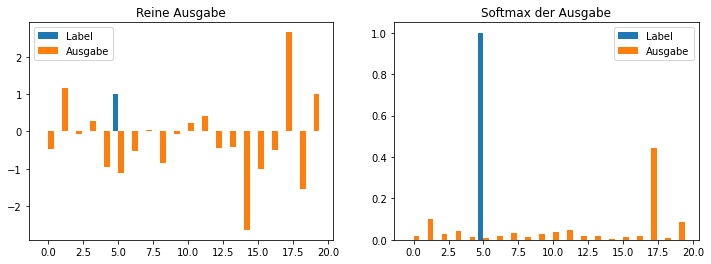

100 0.18391455709934235


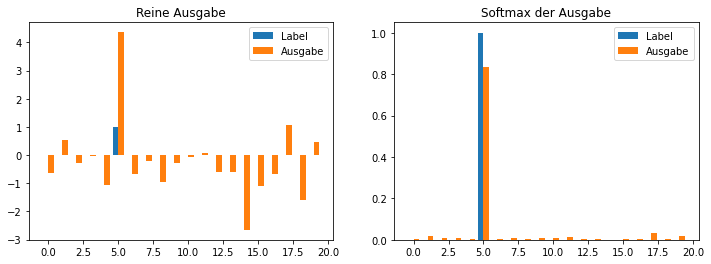

200 0.06564102321863174


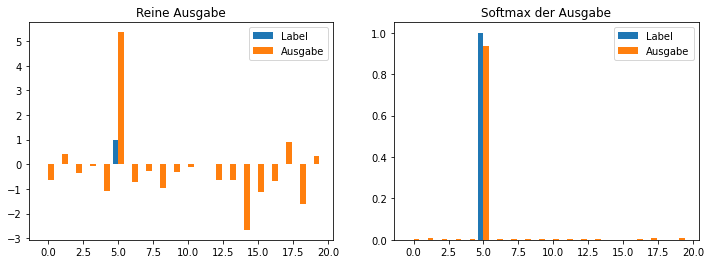

300 0.03917768970131874


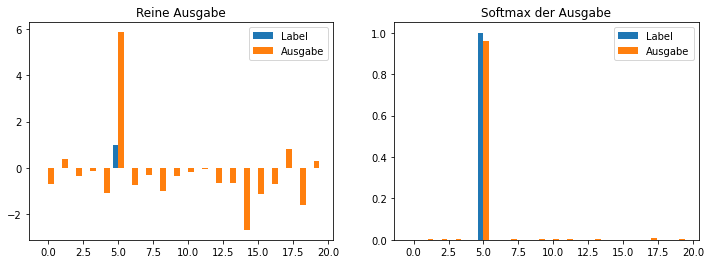

400 0.02780219353735447


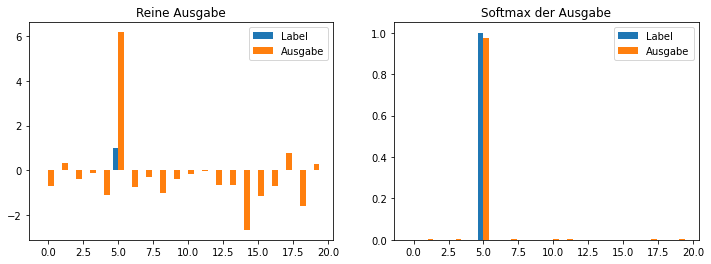

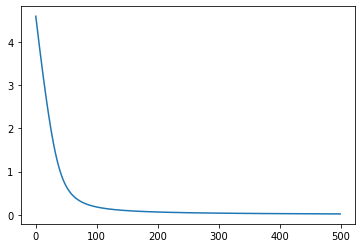

In [18]:
# ------- Wähle Lossfunktion ------- 
#    0: MSE                         |
#    1: L1                          |
#    2: Cross-Entropy               |
#    3: NLL                         |
#    4: Huber                       |
#    5: Smooth-L1                   |
#                    Hier verändern |
#                          |        |
#                          v        |
loss_func = loss_func_list[2]      #|
# ----------------------------------

output = Vektor(n_classes)
optimizer = torch.optim.SGD(output.parameters(), lr=lernrate)

losslist = torch.zeros(n_epochs)
loss = loss_func(output().unsqueeze(0), label.unsqueeze(0))

# Starte Training
for epoch in range(n_epochs):
    if epoch%(n_epochs/5)==0:
        print(epoch, loss.item())
        plt.figure(figsize=[12,4])
        plt.subplot(1,2,1)
        plt.bar(xx-0.2, label, 0.4)
        plt.bar(xx+0.2, output().detach(), 0.4)
        plt.legend(["Label", "Ausgabe"])
        plt.title("Reine Ausgabe")
        plt.subplot(1,2,2)
        plt.bar(xx-0.2, label, 0.4)
        plt.bar(xx+0.2, torch.nn.functional.softmax(output()).detach(), 0.4)
        plt.legend(["Label", "Ausgabe"])
        plt.title("Softmax der Ausgabe")
        plt.show()
    optimizer.zero_grad()
    loss = loss_func(output().unsqueeze(0), label.unsqueeze(0))
    losslist[epoch] = loss.item()
    loss.backward()
    optimizer.step()

plt.figure()
plt.plot(losslist)
plt.show()

